In [21]:
import warnings # for debugging
warnings.filterwarnings('error') # prints line number of warning, supposedly

import pandas as pd
import numpy as np
import uproot
import ROOT

def createDataFrame(filename, treename):
    with uproot.open(filename) as file:
        df = file[treename].arrays(['pathlength_sig', 'pip1_E', 'pip1_px', 'pip1_py', 'pip1_pz', 'pip2_E', 'pip2_px', 'pip2_py', 'pip2_pz', 'pim_E', 'pim_px', 'pim_py', 'pim_pz', 'km_E', 'km_px', 'km_py', 'km_pz', 'p_E', 'p_px', 'p_py', 'p_pz'], library="pd")
        
        ######## DEFINITIONS ########

        # pi_plus (pip2) i.e. one of two components of kShort.  the other is pi_minus (pim)
        # total mass
        # dfKKpi['pip2_m'] = np.sqrt(df['pip2_E']**2 - df['pip2_px']**2 - df['pip2_py']**2 - df['pip2_pz']**2)
        # mass squared
        df['pip2_m2'] = df['pip2_E']**2 - df['pip2_px']**2 - df['pip2_py']**2 - df['pip2_pz']**2

        # pi_minus (pim) i.e. one of two components of kShort.  the other is pi_plus (pip2)
        # total mass
        # df['pim_m'] = np.sqrt(df['pim_E']**2 - df['pim_px']**2 - df['pim_py']**2 - df['pim_pz']**2)
        # mass squared
        df['pim_m2'] = df['pim_E']**2 - df['pim_px']**2 - df['pim_py']**2 - df['pim_pz']**2

        # kShort (pip2 + pim)
        # 4-vector components
        df['ks_E'] = df['pip2_E'] + df['pim_E']
        df['ks_px'] = df['pip2_px'] + df['pim_px']
        df['ks_py'] = df['pip2_py'] + df['pim_py']
        df['ks_pz'] = df['pip2_pz'] + df['pim_pz']
        # total mass
        df['ks_m'] = np.sqrt(df['ks_E']**2 - df['ks_px']**2 - df['ks_py']**2 - df['ks_pz']**2)
        # mass squared
        df['ks_m2'] = df['ks_E']**2 - df['ks_px']**2 - df['ks_py']**2 - df['ks_pz']**2

        # delta++ (pip1 + proton)
        # 4-vector components
        df['delta_E'] = df['pip1_E'] + df['p_E']
        df['delta_px'] = df['pip1_px'] + df['p_px']
        df['delta_py'] = df['pip1_py'] + df['p_py']
        df['delta_pz'] = df['pip1_pz'] + df['p_pz']
        # total mass
        df['delta_m'] = np.sqrt(df['delta_E']**2 - df['delta_px']**2 - df['delta_py']**2 - df['delta_pz']**2)
        # mass squared
        df['delta_m2'] = df['delta_E']**2 - df['delta_px']**2 - df['delta_py']**2 - df['delta_pz']**2

        # lambda (proton + kMinus)
        # 4-vector components
        df['lambda_E'] = df['p_E'] + df['km_E']
        df['lambda_px'] = df['p_px'] + df['km_px']
        df['lambda_py'] = df['p_py'] + df['km_py']
        df['lambda_pz'] = df['p_pz'] + df['km_pz']
        # total mass
        df['lambda_m'] = np.sqrt(df['lambda_E']**2 - df['lambda_px']**2 - df['lambda_py']**2 - df['lambda_pz']**2)
        # mass squared
        df['lambda_m2'] = df['lambda_E']**2 - df['lambda_px']**2 - df['lambda_py']**2 - df['lambda_pz']**2

        # Neutral K* (kMinus + pip1) - for Dalitz plots
        # 4-vector components
        df['kmpip1_E'] = df['pip1_E'] + df['km_E']
        df['kmpip1_px'] = df['pip1_px'] + df['km_px']
        df['kmpip1_py'] = df['pip1_py'] + df['km_py']
        df['kmpip1_pz'] = df['pip1_pz'] + df['km_pz']
        # total mass
        df['kmpip1_m'] = np.sqrt(df['kmpip1_E']**2 - df['kmpip1_px']**2 - df['kmpip1_py']**2 - df['kmpip1_pz']**2)
        # mass squared
        df['kmpip1_m2'] = df['kmpip1_E']**2 - df['kmpip1_px']**2 - df['kmpip1_py']**2 - df['kmpip1_pz']**2

        # Charged K* (kShort + pip1) - for Dalitz plots
        # 4-vector components
        df['kspip1_E'] = df['pip1_E'] + df['ks_E']
        df['kspip1_px'] = df['pip1_px'] + df['ks_px']
        df['kspip1_py'] = df['pip1_py'] + df['ks_py']
        df['kspip1_pz'] = df['pip1_pz'] + df['ks_pz']
        # total mass
        df['kspip1_m'] = np.sqrt(df['kspip1_E']**2 - df['kspip1_px']**2 - df['kspip1_py']**2 - df['kspip1_pz']**2)
        # mass squared
        df['kspip1_m2'] = df['kspip1_E']**2 - df['kspip1_px']**2 - df['kspip1_py']**2 - df['kspip1_pz']**2

        # KKpi (pip1 + kMinus + kShort(pip2 + pim). Final state particles.
        # 4-vector components
        df['KKpi_E'] = df['pip1_E'] + df['km_E'] + df['ks_E']
        df['KKpi_px'] = df['pip1_px'] + df['km_px'] + df['ks_px']
        df['KKpi_py'] = df['pip1_py'] + df['km_py'] + df['ks_py']
        df['KKpi_pz'] = df['pip1_pz'] + df['km_pz'] + df['ks_pz']
        # total mass
        df['KKpi_m'] = np.sqrt(df['KKpi_E']**2 - df['KKpi_px']**2 - df['KKpi_py']**2 - df['KKpi_pz']**2)
        # mass squared
        df['KKpi_m2'] = df['KKpi_E']**2 - df['KKpi_px']**2 - df['KKpi_py']**2 - df['KKpi_pz']**2

        return df

dfKKpi = createDataFrame("KKpi_flat_bestX2_2017.root", "pipkmks__B4_M16;1")


## Cuts

In [22]:
# Define cuts

reject_delta = dfKKpi['delta_m'] > 1.4 # delta++ cut
reject_lambda = dfKKpi['lambda_m'] > 1.9 # lambda cut
keep_kstar_plus = (dfKKpi['kspip1_m'] >= 0.8) & (dfKKpi['kspip1_m'] <= 1.0) # "charged" K*(KsPi+)
keep_kstar_zero = (dfKKpi['kmpip1_m'] >= 0.8) & (dfKKpi['kmpip1_m'] <= 1.0) # "neutral" K*(K-Pi+)
reject_kstar_plus = (dfKKpi['kspip1_m'] <= 0.8) | (dfKKpi['kspip1_m'] >= 1.0) # Reject "charged" K*(KsPi+)
reject_kstar_zero = (dfKKpi['kmpip1_m'] <= 0.8) | (dfKKpi['kmpip1_m'] >= 1.0) # Reject "neutral" K*(K-Pi+)
select_kShort = (dfKKpi['ks_m'] >= 0.45) & (dfKKpi['ks_m'] <= 0.55) # Select kShort
reject_kShort = (dfKKpi['ks_m'] <= 0.45) | (dfKKpi['ks_m'] >= 0.55) # Reject kShort
pathlength_sig = dfKKpi['pathlength_sig'] > 5

### kShort histogram

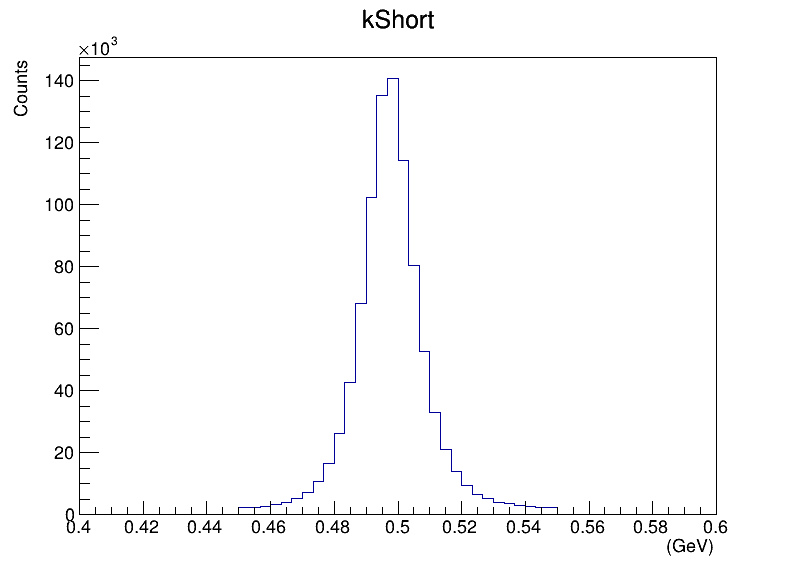

Info in <TCanvas::Print>: png file ../_plots/plot.png has been created


In [23]:
from IPython.display import Image, display

def analysis(df):
    
    ######## APPLY CUTS ########
    filtered_df = dfKKpi[select_kShort & pathlength_sig]
    ############################

    # Create a histogram, canvas then draw
    h1 = ROOT.TH1F("hNew", "kShort; (GeV); Counts", 60, 0.400, 0.600)
    canvas = ROOT.TCanvas("c", "c", 800, 600)
    # Fill the histogram
    for value in filtered_df['ks_m']:
        h1.Fill(value)
    h1.SetStats(False)
    h1.Draw()
    
    img_path = "../_plots/plot.png"
    canvas.SaveAs(img_path)
    canvas.Close()

    # Display the saved image
    display(Image(filename=img_path))

analysis(dfKKpi)


### KK $\pi$ Histogram

### Dalitz Plots (kShort + $\pi$+) vs. (kMinus + $\pi$+)